In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score as acc 
from sklearn.metrics import confusion_matrix

In [2]:
X,y = load_breast_cancer(return_X_y=True,as_frame=True)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [4]:
print(np.unique(y))
print(np.bincount(y))

[0 1]
[212 357]


# Gradient Descent Based Logistic Regression Classifier

In [5]:
class LR_GD:
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0] 
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1 - output))) / X.shape[0])
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

# 5-fold CV

In [6]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size = 0.2, random_state = 42, 
                                                                shuffle = False)

In [7]:
sc = StandardScaler()
sc.fit(X_train_cv)
X_train_std_cv = sc.transform(X_train_cv)
X_test_std_cv = sc.transform(X_test_cv)

In [8]:
def five_fold_cv(eta, n_iter):
    
    df = pd.DataFrame(data=X_train_std_cv)
    df['Label'] = y_train_cv
    
    n = len(df)//5
    
    lr_cv0 = LR_GD(eta, n_iter)
    lr_cv1 = LR_GD(eta, n_iter)
    lr_cv2 = LR_GD(eta, n_iter)
    lr_cv3 = LR_GD(eta, n_iter)
    lr_cv4 = LR_GD(eta, n_iter)
     
    acc_lst = []
    
    for i in range(5):

        df = df.reindex(np.random.permutation(df.index))  
        df = df.reset_index(drop=True) 
    
        fold1 = df.loc[0:n-1]
        fold2 = df.loc[n:2*n-1]
        fold3 = df.loc[2*n:3*n-1]
        fold4 = df.loc[3*n:4*n-1]
        fold5 = df.loc[4*n:]

        if i == 0:
            train_val = pd.concat([fold1, fold2, fold3, fold4])
            test_val = fold5
        
            training_features = train_val.iloc[:,0:30].values
            training_labels = train_val.iloc[:,-1].values
        
            test_features = test_val.iloc[:,0:30].values
            test_labels = test_val.iloc[:,-1].values
        
            lr_cv0.fit(training_features, training_labels)
            y_pred_cv = lr_cv0.predict(test_features)
        
            accuracy = acc(y_pred_cv, test_labels)
                           
            acc_lst.append(accuracy)

        elif i == 1:
            train_val = pd.concat([fold1, fold2, fold3, fold5])
            test_val = fold4
        
            training_features = train_val.iloc[:,0:30].values
            training_labels = train_val.iloc[:,-1].values
        
            test_features = test_val.iloc[:,0:30].values
            test_labels = test_val.iloc[:,-1].values
        
            lr_cv1.fit(training_features, training_labels)
            y_pred_cv = lr_cv1.predict(test_features)
        
            accuracy = acc(y_pred_cv, test_labels)
                           
            acc_lst.append(accuracy)

        elif i == 2:
            train_val = pd.concat([fold1, fold2, fold4, fold5])
            test_val = fold3

            training_features = train_val.iloc[:,0:30].values
            training_labels = train_val.iloc[:,-1].values
        
            test_features = test_val.iloc[:,0:30].values
            test_labels = test_val.iloc[:,-1].values
        
            lr_cv2.fit(training_features, training_labels)
            y_pred_cv = lr_cv2.predict(test_features)
        
            accuracy = acc(y_pred_cv, test_labels)
            
            acc_lst.append(accuracy)

        elif i == 3:
            train_val = pd.concat([fold1, fold3, fold4, fold5])
            test_val = fold2
        
            training_features = train_val.iloc[:,0:30].values
            training_labels = train_val.iloc[:,-1].values
        
            test_features = test_val.iloc[:,0:30].values
            test_labels = test_val.iloc[:,-1].values
        
            lr_cv3.fit(training_features, training_labels)
            y_pred_cv = lr_cv3.predict(test_features)
            
            accuracy = acc(y_pred_cv, test_labels)
            
            acc_lst.append(accuracy)
         
        elif i == 4:
            train_val = pd.concat([fold2, fold3, fold4, fold5])
            test_val = fold1
                    
            training_features = train_val.iloc[:,0:30].values
            training_labels = train_val.iloc[:,-1].values
        
            test_features = test_val.iloc[:,0:30].values
            test_labels = test_val.iloc[:,-1].values
        
            lr_cv4.fit(training_features, training_labels)
            y_pred_cv = lr_cv4.predict(test_features)
        
            accuracy = acc(y_pred_cv, test_labels)

            acc_lst.append(accuracy)
        
    return [acc_lst,('Avg Accuracy:',(np.round(sum(acc_lst) / len(acc_lst),5)))];

# Grid Search

In [9]:
params = []
etas = [0.001, 0.005, 0.01, 0.015, 0.02, 0.025]
iters = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
for i in itertools.product(etas, iters):
    params.append(i)

In [10]:
def grid_search(params):
    best = 0
    index = 0
    for i in range(len(params)):
        x = five_fold_cv(eta = params[i][0], n_iter = params[i][1])
        if x[1][1] > best:
            best = x[1][1] 
            index = i
            print(f'Accuracy: {best}, Index: {i}')
    return(f'Best Parameters: {params[index]}')

In [11]:
grid_search(params)

Accuracy: 0.93187, Index: 0
Accuracy: 0.96044, Index: 1
Accuracy: 0.96484, Index: 5
Accuracy: 0.97582, Index: 8
Accuracy: 0.98022, Index: 16
Accuracy: 0.98242, Index: 25
Accuracy: 0.98462, Index: 28


'Best Parameters: (0.015, 2500)'

# Final Model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
lr = LR_GD(eta = 0.015, n_iter = 2500)
lr.fit(X_train_std, y_train)

In [15]:
y_pred_lr = lr.predict(X_test_std)

In [16]:
acc(y_pred_lr, y_test)

0.9824561403508771

<function matplotlib.pyplot.show(close=None, block=None)>

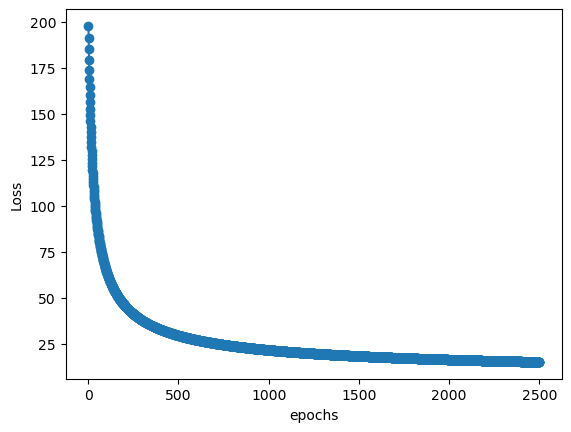

In [17]:
plt.plot(range(1, len(lr.losses_) + 1), 
        lr.losses_, marker = 'o')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show

In [18]:
mc = np.where(y_pred_lr != y_test)[0]
mc

array([ 20, 112])

In [19]:
mc_table = pd.DataFrame(X_test.to_numpy()[y] for y in mc)

In [20]:
mc_table = mc_table.rename(columns={0:'mean radius',1:'mean texture',2:'mean perimeter',3:'mean area',4:'mean smoothness',
                                    5:'mean compactness', 6:'mean concavity',7:'mean concave points',8:'mean symmetry',
                                    9:'mean fractal dimension',10:'radius error', 11:'texture error', 12:'perimeter error',
                                    13:'area error',14:'smoothness error',15:'compactness error',16:'concavity error',17:'concave points error',
                                    18:'symmetry error',19:'fractal dimension error',20:'worst radius',21:'worst texture',
                                    22:'worst perimeter',23:'worst area',24:'worst smoothness',25:'worst compactness',
                                    26:'worst concavity',27:'worst concave points',28:'worst symmetry',29:'worst fractal dimension',})

mc_table['Actual Label'] = [y_test.iloc[y] for y in mc]
mc_table['Predicted Label'] = [y_pred_lr[y] for y in mc]
mc_table

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Actual Label,Predicted Label
0,13.80,15.79,90.43,584.1,0.10070,0.1280,0.07789,0.05069,0.1662,0.06566,0.2787,0.6205,1.957,23.35,0.004717,0.02065,0.01759,0.009206,0.01220,0.003130,16.57,20.86,110.3,812.4,0.1411,0.3542,0.2779,0.13830,0.2589,0.10300,0,1
1,14.22,27.85,92.55,623.9,0.08223,0.1039,0.11030,0.04408,0.1342,0.06129,0.3354,2.3240,2.105,29.96,0.006307,0.02845,0.03850,0.010110,0.01185,0.003589,15.75,40.54,102.5,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796,1,0


In [21]:
confusion_matrix(y_test,y_pred_lr)

array([[42,  1],
       [ 1, 70]])